In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
!python train.py --agent=ACCOUNTANT --iterations=10 --save_tag=_2a
!python train.py --agent=GAMBLER --iterations=10 --save_tag=_2a
!python train.py --agent=DRUNKARD --iterations=10 --save_tag=_2a

{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
    0  1  2  3  4
0  0  4  0  0  0
1  0  0  4  0  0
{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
         0    1        2       3  4
0  0.6125  0.0  0.00000  0.0000  0
1  0.0000  0.5  1.36015  1.2401  0
{"step": 0, "performance": 0.0, "total_reward": 0}


Final Q-table
 Empty DataFrame
Columns: []
Index: []


In [73]:
# alpha = 0.4 = learning rate
# gamma = 0.8 = discount
# epsilon = .. = explore

!python train.py --agent=GAMBLER_HW --iterations=10 --learning_rate=0.4 --discount=0.8 --exploration_rate=0.5 --save_tag=_2b --step_max=1

1
{"step": 0, "performance": 0.0, "total_reward": 0}
2
{"step": 1, "performance": 0.008, "total_reward": 2}
3
{"step": 2, "performance": 0.0, "total_reward": 2}
4
{"step": 3, "performance": 0.0, "total_reward": 2}
5
Switch exploration rate at iter 5 to rate 0.5
{"step": 4, "performance": 0.008, "total_reward": 4}
6
{"step": 5, "performance": 0.0, "total_reward": 4}
7
{"step": 6, "performance": 0.008, "total_reward": 6}
8
{"step": 7, "performance": 0.0, "total_reward": 6}
9
{"step": 8, "performance": 0.008, "total_reward": 8}
10
{"step": 9, "performance": 0.008, "total_reward": 10}


Final Q-table
           0         1        2  3  4
0  1.318822  0.000000  0.00000  0  0
1  0.000000  1.692242  0.88192  0  0


In [74]:
!python train.py --agent=ACCOUNTANT --iterations=10 --save_tag=_2b --step_max=1

{"step": 0, "performance": 0.0, "total_reward": 0}
{"step": 1, "performance": 0.0, "total_reward": 0}
{"step": 2, "performance": 0.008, "total_reward": 2}
{"step": 3, "performance": 0.0, "total_reward": 2}
{"step": 4, "performance": 0.008, "total_reward": 4}
{"step": 5, "performance": 0.0, "total_reward": 4}
{"step": 6, "performance": 0.008, "total_reward": 6}
{"step": 7, "performance": 0.0, "total_reward": 6}
{"step": 8, "performance": 0.0, "total_reward": 6}
{"step": 9, "performance": 0.008, "total_reward": 8}


Final Q-table
    0  1  2  3  4
0  0  4  0  0  0
1  0  0  4  0  0


In [75]:
!python train.py --agent=DRUNKARD --iterations=10 --save_tag=_2b --step_max=1

{"step": 0, "performance": 0.0, "total_reward": 0}
{"step": 1, "performance": 0.0, "total_reward": 0}
{"step": 2, "performance": 0.008, "total_reward": 2}
{"step": 3, "performance": 0.0, "total_reward": 2}
{"step": 4, "performance": 0.008, "total_reward": 4}
{"step": 5, "performance": 0.0, "total_reward": 4}
{"step": 6, "performance": 0.0, "total_reward": 4}
{"step": 7, "performance": 0.008, "total_reward": 6}
{"step": 8, "performance": 0.0, "total_reward": 6}
{"step": 9, "performance": 0.0, "total_reward": 6}


Final Q-table
 Empty DataFrame
Columns: []
Index: []


In [76]:
gambler = pd.read_csv('simple_RL_GAMBLER_HW_2b.csv')
accountant = pd.read_csv('simple_RL_ACCOUNTANT_2b.csv')
drunkard = pd.read_csv('simple_RL_DRUNKARD_2b.csv')

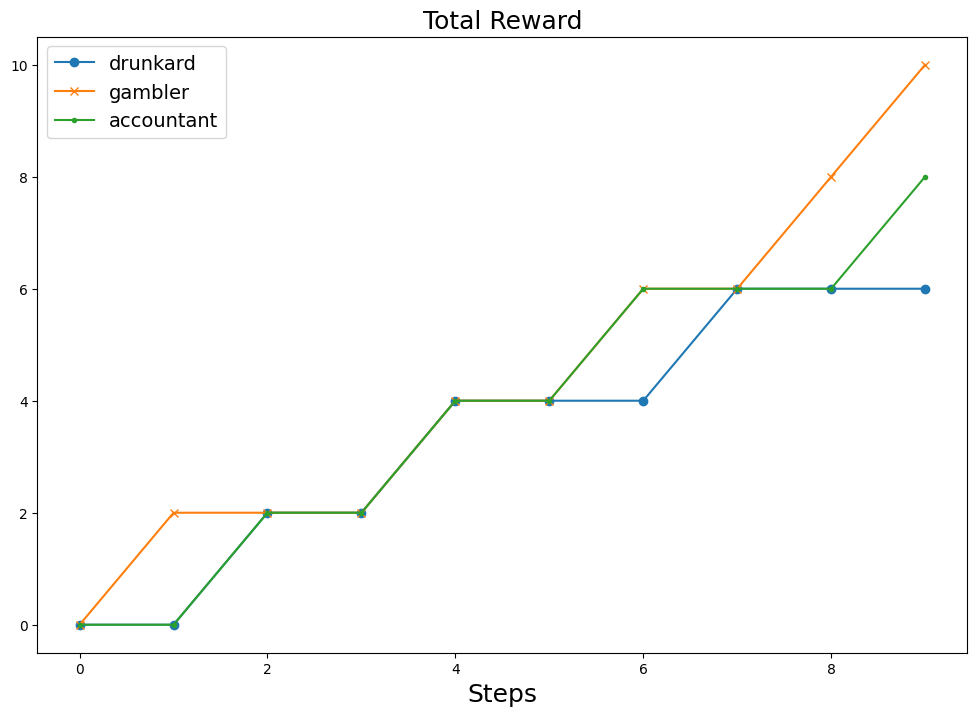

In [77]:

plt.figure(figsize=(12,8))
plt.plot(drunkard['Step'], drunkard['Total Reward'], label='drunkard', marker='o')
plt.plot(gambler['Step'], gambler['Total Reward'], label='gambler',marker='x')
plt.plot(accountant['Step'], accountant['Total Reward'], label='accountant',marker='.')
plt.xlabel('Steps', fontsize=18)
plt.title('Total Reward', fontsize=18)
plt.legend(prop={'size': 14})
plt.show()